In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

# About Dataset

## Credit Risk Dataset
This dataset contains columns simulating credit bureau data. Source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset 

## Features/columns

1. person_age: Age
2. person_income: Annual Income
3. person_home_ownership: Home ownership
4. person_emp_length: Employment length (in years)
5. loan_intent: Loan intent
6. loan_grade: Loan grade
7. loan_amnt: Loan amount
8. loan_int_rate: Interest rate
9. loan_status: Loan status (0 is non default 1 is default)
10. loan_percent_income: Percent of money that loan is from income
11. cb_person_default_on_file: Historical default
12. cb_preson_cred_hist_length: Credit history length

In [79]:
data = pd.read_csv('C:/Users/Victor Manuel/Desktop/Brainnest/Week 4/Final Project/Datasets/credit_risk_dataset.csv')
display(data.head(20))
data.shape

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


(32581, 12)

# Exploratory Data Analysis

In [80]:
#drop duplicates
data.drop_duplicates(inplace=True) #deletes duplicated rows

# Check for missing values
print(data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [81]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [82]:
#Identify columns and their corresponding amount of unique values
for col in data:
    print(col,'--->', data[col].nunique()) #if amount of unique values<20 show distribution
    if data[col].nunique()<20:
        print(data[col].value_counts(normalize=True)*100) #distribution
    print()

person_age ---> 57

person_income ---> 3835

person_home_ownership ---> 4
RENT        50.868391
MORTGAGE    41.177503
OWN          7.627803
OTHER        0.326304
Name: person_home_ownership, dtype: float64

person_emp_length ---> 36

loan_intent ---> 6
EDUCATION            19.894039
MEDICAL              18.487071
VENTURE              17.434476
PERSONAL             17.048525
DEBTCONSOLIDATION    15.953826
HOMEIMPROVEMENT      11.182064
Name: loan_intent, dtype: float64

loan_grade ---> 7
A    32.788323
B    31.907652
C    19.936143
D    11.378548
E     3.049016
F     0.733308
G     0.207010
Name: loan_grade, dtype: float64

loan_amnt ---> 728

loan_int_rate ---> 348

loan_status ---> 2
0    78.288481
1    21.711519
Name: loan_status, dtype: float64

loan_percent_income ---> 77

cb_person_default_on_file ---> 2
N    82.140978
Y    17.859022
Name: cb_person_default_on_file, dtype: float64

cb_person_cred_hist_length ---> 29



In [83]:
#Explicitely see unique value
display(data['person_age'].unique()) #integer
display(data['person_income'].unique()) #continuous
display(data['person_home_ownership'].unique()) #categorical
display(data['person_emp_length'].unique()) #integer
display(data['loan_intent'].unique()) #categorical
display(data['loan_grade'].unique()) #categorical
display(data['loan_amnt'].unique()) #integer
display(data['loan_int_rate'].unique()) #continuous
display(data['loan_status'].unique()) #categorical (binary)
display(data['loan_percent_income'].unique()) #continuous[0,1]
display(data['cb_person_default_on_file'].unique()) #categorical (yes,no)
display(data['cb_person_cred_hist_length'].unique()) #integer

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  50,  37,  39,  40,  43,  41,  46,
        38,  47,  42,  44,  48,  45,  49,  58,  65,  51,  53,  66,  57,
        59,  62,  54,  60,  55,  52,  61,  64,  70,  78,  69,  56,  73,
        63,  80,  84,  76,  67], dtype=int64)

array([ 59000,   9600,  65500, ...,  39240, 129000, 720000], dtype=int64)

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,  22.,
        20.,  21.,  24.,  23.,  26.,  25.,  27.,  31.,  28.,  41.,  34.,
        29.,  38.,  30.])

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

array([35000,  1000,  5500,  2500,  1600,  4500, 30000,  1750, 34800,
       34000,  1500, 33950, 33000,  4575,  1400, 32500,  4000,  2000,
       32000, 31050, 24250,  7800, 20000, 10000, 25000, 18000, 12000,
       29100, 28000,  9600,  3000,  6100,  4200,  4750,  4800,  3250,
       27500, 27050, 27000, 26000, 25600, 25475, 21600, 11900, 25300,
        3650,  2400,  3600,  7500,  4950, 21000, 16000, 22000,  7750,
       24000, 15000, 15500,  9000,  6000, 23050,  5375,  6250,  5000,
        2100, 14000,  6200,  9950,  2600,  8000,  4600,  3500,  7200,
        8800,  3175,  2800, 13000,  1800,  3300,  3200,  2275,  5600,
        3625,  4375, 24750, 24500, 15250, 24150,  4900, 23750, 23600,
       23575,  5400, 23400, 23000,  1200, 22750, 22500, 22400, 22250,
        7400, 21700, 21500, 21450, 21250, 20900, 20500, 20400, 20375,
       20050,  9250,  6400,  5650, 16600,  7125,  7000,  1275,  1625,
        8500,  5200,  3800,  4400,  3825,  5875,  1550,  7350, 10625,
       19900, 19800,

array([16.02, 11.14, 12.87, 15.23, 14.27,  7.14, 12.42, 11.11,  8.9 ,
       14.74, 10.37,  8.63,  7.9 , 18.39, 10.65, 20.25, 18.25, 10.99,
        7.49, 16.77, 17.58,  7.29, 14.54, 12.68, 17.74,  9.32,  9.99,
       12.84, 11.12,  6.62, 14.17, 13.85, 13.49,  7.51, 16.89, 17.99,
       12.69,  7.88, 19.41, 10.38, 15.33, 16.45, 18.62, 15.96, 11.48,
        5.99, 11.58, 15.7 , 15.99, 14.84, 14.42,  6.99, 13.61,  9.91,
       13.48, 12.98, 13.57, 15.68, 13.06, 15.62, 11.71,  8.88, 12.18,
       13.99, 12.73, 11.49, 19.91, 11.83, 14.59,  9.64, 16.35, 18.67,
       10.08, 10.36, 12.23, 16.07, 14.22, 14.79, 13.22, 11.86, 13.43,
       15.28, 17.93,  9.25, 10.62, 18.43, 11.36, 15.65, 13.04, 17.04,
       14.83, 14.65, 16.82, 10.25, 14.96, 11.99,  8.49,  6.17, 16.32,
       14.35, 15.21, 14.09, 17.49, 13.92, 16.49,  5.79, 13.11,  6.54,
       12.53, 15.95, 10.74, 15.27, 14.72, 13.35,  7.68, 14.46, 13.47,
        6.03, 12.92, 18.64, 16.7 , 18.3 ,  9.63, 14.7 , 15.37, 14.26,
        8.  , 11.26,

array([1, 0], dtype=int64)

array([0.59, 0.1 , 0.57, 0.53, 0.55, 0.25, 0.45, 0.44, 0.42, 0.16, 0.41,
       0.37, 0.32, 0.3 , 0.06, 0.29, 0.31, 0.22, 0.52, 0.14, 0.49, 0.13,
       0.5 , 0.35, 0.17, 0.27, 0.33, 0.08, 0.03, 0.21, 0.63, 0.47, 0.4 ,
       0.07, 0.38, 0.34, 0.04, 0.23, 0.11, 0.43, 0.51, 0.02, 0.28, 0.19,
       0.39, 0.09, 0.05, 0.15, 0.18, 0.6 , 0.01, 0.48, 0.12, 0.54, 0.56,
       0.46, 0.36, 0.24, 0.26, 0.2 , 0.72, 0.64, 0.69, 0.77, 0.61, 0.83,
       0.65, 0.67, 0.58, 0.71, 0.68, 0.7 , 0.66, 0.  , 0.76, 0.62, 0.78])

array(['Y', 'N'], dtype=object)

array([ 3,  2,  4,  8,  7,  6,  9, 10,  5, 11, 15, 17, 12, 13, 14, 16, 25,
       28, 27, 22, 19, 29, 23, 26, 20, 21, 30, 24, 18], dtype=int64)

In [84]:
#Descriptive statistics
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### We'll assume that a person of age 80 or greater will not actually apply for a loan, so we'll get rid of those rows

In [85]:
data.loc[data['person_age']>=80,:]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


In [86]:
data = data.loc[data['person_age']<80, :]

In [87]:
data.shape

(28495, 12)

### 14 years old is the age where a person is legally aloud to work, we'll asume any person working for more than 60 years is automatically not a good candidate for a loan

In [88]:
data.loc[data['person_emp_length']>=60,:]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


### Also we'll assume that person_age <= 14 years + person_employment_length

In [89]:
data.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [66]:
data = data.loc[(data['person_emp_length']<60 | data['person_emp_length'].isna()), :]

In [90]:
data.shape

(28495, 12)

## Data Visualization

In [24]:
import plotly.express as px
#%matplotlib inline

fig = px.scatter_matrix(data, dimensions=
            ["person_age", "person_income", "person_emp_length",
             "loan_amnt","loan_int_rate"],
            labels={col:col.replace('_', ' ') for col in data.columns},
            height=900, color='loan_status',
            color_continuous_scale=px.colors.diverging.oxy)
fig.show()

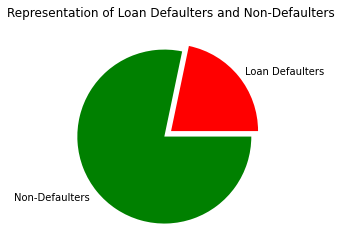

In [91]:
#Number of loan defaulters and non-defaulters
loan_defaulters = data[data.loan_status == 1].loan_status.count()
non_defaulters = data[data.loan_status == 0].loan_status.count()
# pie chart showing loan defaulters vs non-defaulters
values = [loan_defaulters, non_defaulters]
colors = ['r', 'g']
explode = [0, 0.1]
labels = ['Loan Defaulters', 'Non-Defaulters']
plt.pie(values, colors=colors, labels=labels, explode=explode)
plt.title('Representation of Loan Defaulters and Non-Defaulters')
plt.show()

In [27]:
# next, let's see the relationship between loan_status as regards loan_grade and loan_percent_income
fig = px.box(data, x="loan_grade", y="loan_percent_income",
color="loan_status",
color_discrete_sequence=px.colors.qualitative.Set1,
labels={col:col.replace('_','-') for col in data.columns},
category_orders={'loan_grade':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",
                y=1.02, xanchor="right", x=1))
fig.show()

### Histograms

In [92]:
#Identifying numerical columns
numerical_cols = [col for col in data if data[col].dtypes != 'O']
numerical_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

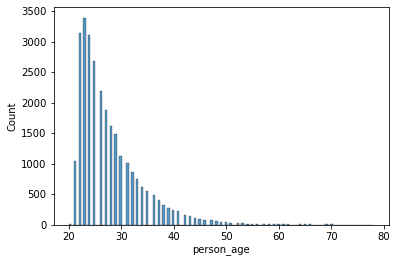

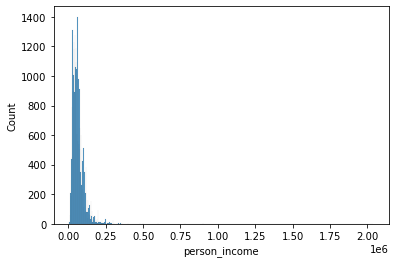

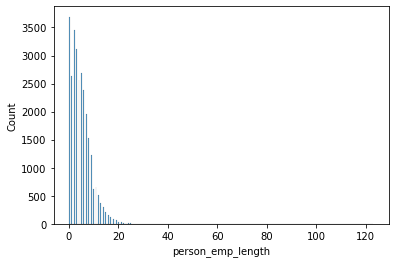

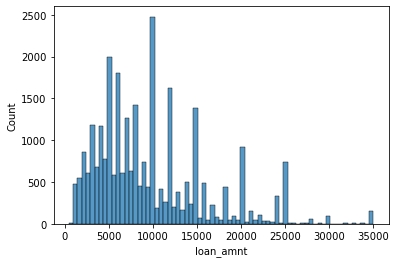

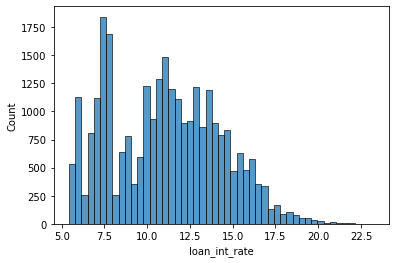

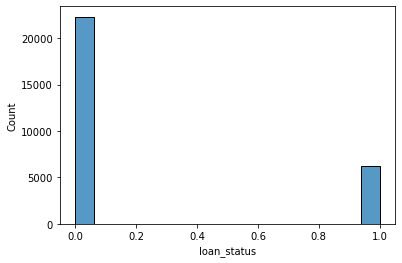

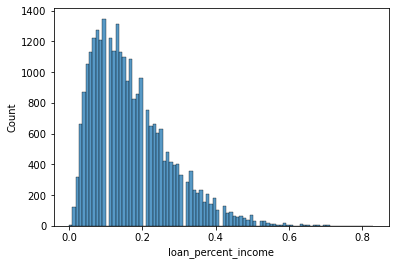

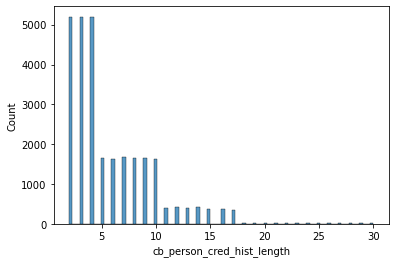

In [93]:
for col in numerical_cols:
    sns.histplot(data[col])
    plt.show()

In [94]:
data[['person_income','loan_amnt','loan_percent_income']].head()

,person_income,loan_amnt,loan_percent_income
0,59000,35000,0.59
1,9600,1000,0.10
2,9600,5500,0.57
3,65500,35000,0.53
4,54400,35000,0.55


We'll delete loan_percent_income because it is not adding new information and it wont be helpful for the model, it can be obtained by loan_amnt/person_income

In [95]:
#data.drop('loan_percent_income',axis=1,inplace=True)
data.drop('loan_percent_income',axis='columns',inplace=True)

# Model

### One-Hot encoding

In [96]:
#Identifying categorical columns
categorical_cols = [col for col in data if data[col].dtypes == 'O']
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [97]:
# Convert categorical variables to numerical form using one-hot encoding
for col in categorical_cols:
    dummies = pd.get_dummies(data[col], prefix=col)#Convert categorical variable into dummy/indicator variables.
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

In [98]:
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,30,1,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,19,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,28,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,26,1,0,0,...,0,0,1,0,0,0,0,0,1,0


## Splitting dataset

In [99]:
# Split the data into training and testing sets
X = data.drop('loan_status', axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size=0.2, stratify=data['loan_status'], shuffle=True)

#shuffle: Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

In [100]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#normalization/standarization
X_test = scaler.transform(X_test) 

In [101]:
data['loan_status'].value_counts(normalize=True)
#normalize: bool, default False. Return proportions rather than frequencies.

0    0.782839
1    0.217161
Name: loan_status, dtype: float64

We have 78% of data in loan_status as 0 and 21% as 1

In [74]:
y.value_counts(normalize=True)

0    0.720264
1    0.279736
Name: loan_status, dtype: float64

In [75]:
y_test.value_counts(normalize=True)

0    0.720049
1    0.279951
Name: loan_status, dtype: float64

## Training and Evaluating- Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random forest accuracy: {accuracy:.3f}')

Random forest accuracy: 0.927


# Model version 2

### Pipeline

In [79]:

num_pipe = Pipeline([
    ('impute', IterativeImputer()), #impute all missing values
    ('scale', StandardScaler()), #scale all numerical columns
])

### Column Transformer

In [81]:
ct = ColumnTransformer([
    ('num_pipe', num_pipe, numerical_cols),
    ('cat_cols', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

#For the numerical columns, We have two columns with missing values: person_emp_length and loan_int_rate. So we need to antem them
#For the categorical columns, since we dont have missing values we simplu just run OneHotEncoder

In [87]:
#this grid is basically a dictionary
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
    
    LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        #KNeighborsRegressor()]},
}

SyntaxError: unexpected EOF while parsing (2901484064.py, line 13)